Osnabrück University - Machine Learning (Summer Term 2018) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 06

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, May 20, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's studip folder.

## Assignment 0: Math recap (Hyperplanes) [2 Bonus Points]

This exercise is supposed to be very easy and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *hyperplane*? What are the hyperlanes in $\mathbb{R}^2$ and $\mathbb{R}^3$? How are the usually described?

Hyperplanes are **subspaces** which have **one dimension less** than the space they are in. That is, hyperplanes in $\mathbb{R}^3$ are 2-dimensional planes, while in $\mathbb{R}^2$ they are 1-dimensional lines. 
In this imaginable dimensions you can see that hyperplanes will split the space in two parts.

If you are in $\mathbb{R}^n$ a hyperplane is described by an equation
$$ a_1 x_1 + a_2 x_2 + ... + a_n x_n = b$$
where at least one $a_i$ is non-zero and $b$ is a constant. (Remark: the description of a line as a function in the form $y=mx+b$, as you may know it from school, is recovered as a special case, when you set $x_1=x$, $x_2=y$, $a_1=-m$, and $a_2=1$).

**b)** What is the Hesse normal form? What is the intuition behind? What are its advantages?

The **Hesse normal form** is a way to define a hyperplane. It is given by the following equation

$$\vec{x} \cdot \vec{n_0} - d = 0$$

$\vec{n_0}$ is the unit normal vector that points from the **origin** to the plane and is orthogonal to the plane. $d$ describes the distance from the origin to the plane.

The hesse normal form is basically the same as the equation from exercise a). The only difference is that it's normalized ($n_0$ has length 1 and thus $d$ is the distance). This helps, for example, at computing the distance from a point to a hyperplane.

**c)** Can you transform the standard form of a hyperplane into the Hesse normal form and vice versa?

If you got the standard form
$$ a_1 x_1 + a_2 x_2 + ... + a_n x_n = b$$
you can compute 
$$ \vec{n_0} = \frac{\vec{a}}{|\vec{a}|} \\ d = \frac{b}{|\vec{a}|} $$
The standard form is not recoverable from the normal form as there is not one standard form, but infinite many which would all be *normed* to the same Hesse normal form.

## Assignment 1: Local PCA (8 Points)

In the lecture we learned that regular PCA is ill suited for special cases of data. In this assignment we will take a look at local PCA which is used for clustered data (ML-06, Slide 25). This is mostly a repetition of algorithms we already used. Feel free to use the built-in functions for k-means clustering and PCA from the libraries (we already included the right imports to set you on track).

<IPython.core.display.Javascript object>


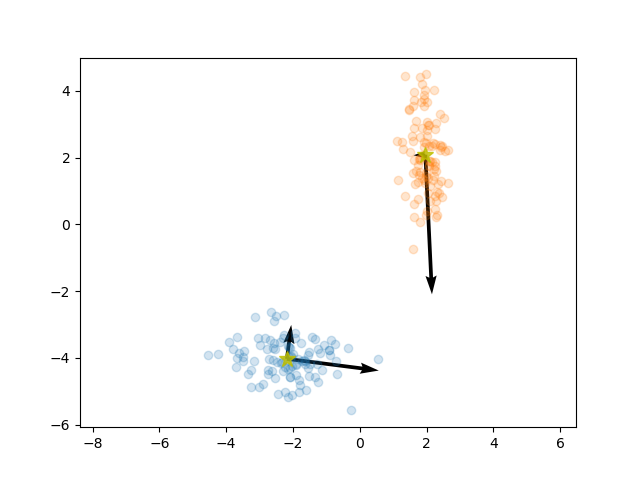

(-4.918610202198817, 3.018238040636826, -6.074100165072419, 4.993810973505613)

In [2]:
%matplotlib notebook

import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

from numpy.random import multivariate_normal as multNorm

from scipy.cluster.vq import kmeans, vq
from sklearn.decomposition.pca import PCA

# Generate clustered data - you may plot the data to take a look at it
data = np.vstack((multNorm([2, 2], [[0.1, 0], [0, 1]], 100),
                  multNorm([-2, -4], [[1, 0], [0, 0.3]], 100)))

# TODO: Apply k-means to the data.
### BEGIN SOLUTION
# Compute k-means with K = 2 (2 clusters).
centroids, _ = kmeans(data, 2)

# Assign each sample to a cluster.
idx, _ = vq(data, centroids)
### END SOLUTION

# TODO: Apply PCA for each cluster and store each two largest components.
### BEGIN SOLUTION
pcs = np.empty([np.unique(idx).size, 2, 2])
for idxU in np.unique(idx):
    # Create PCA instance.
    pca = PCA(2)
    # Fit the data to the PCA instance
    pca.fit(data[idx == idxU])
    # Retrieve, scale and store the components
    pcs[idxU] = (pca.components_.T * pca.explained_variance_).T
### END SOLUTION

# TODO: Plot the results of k-means and local PCA
### BEGIN SOLUTION
fig, ax = plt.subplots(num='Local PCA')

# make cluster centroids the same format as the PCs
cls = np.tile(centroids[np.newaxis], (pcs.shape[0], 1, 1))

# plot data, PCs and centroids
for i, idxU in enumerate(np.unique(idx)):
    ax.plot(*zip(*data[idx == idxU]), 'o', alpha=0.2)
    ax.quiver(*cls[:, i, :].T, *pcs[i, :, :].T, scale_units='xy', scale=0.3)

ax.plot(centroids[:, 0], centroids[:, 1], '*y', markersize=12, alpha=0.8)
ax.axis('equal')
### END SOLUTION

## Assignment 2: Data Visualization and Chernoff Faces (6 Points)

The following exercise contains no programming (unless you want to go through the implementation). Answer the questions that are posted below the code segment (and run the code before - it's really worth it!). In case you are even more interested - here is a link to the [original paper](http://www.dtic.mil/cgi-bin/GetTRDoc?AD=AD0738473).

<IPython.core.display.Javascript object>


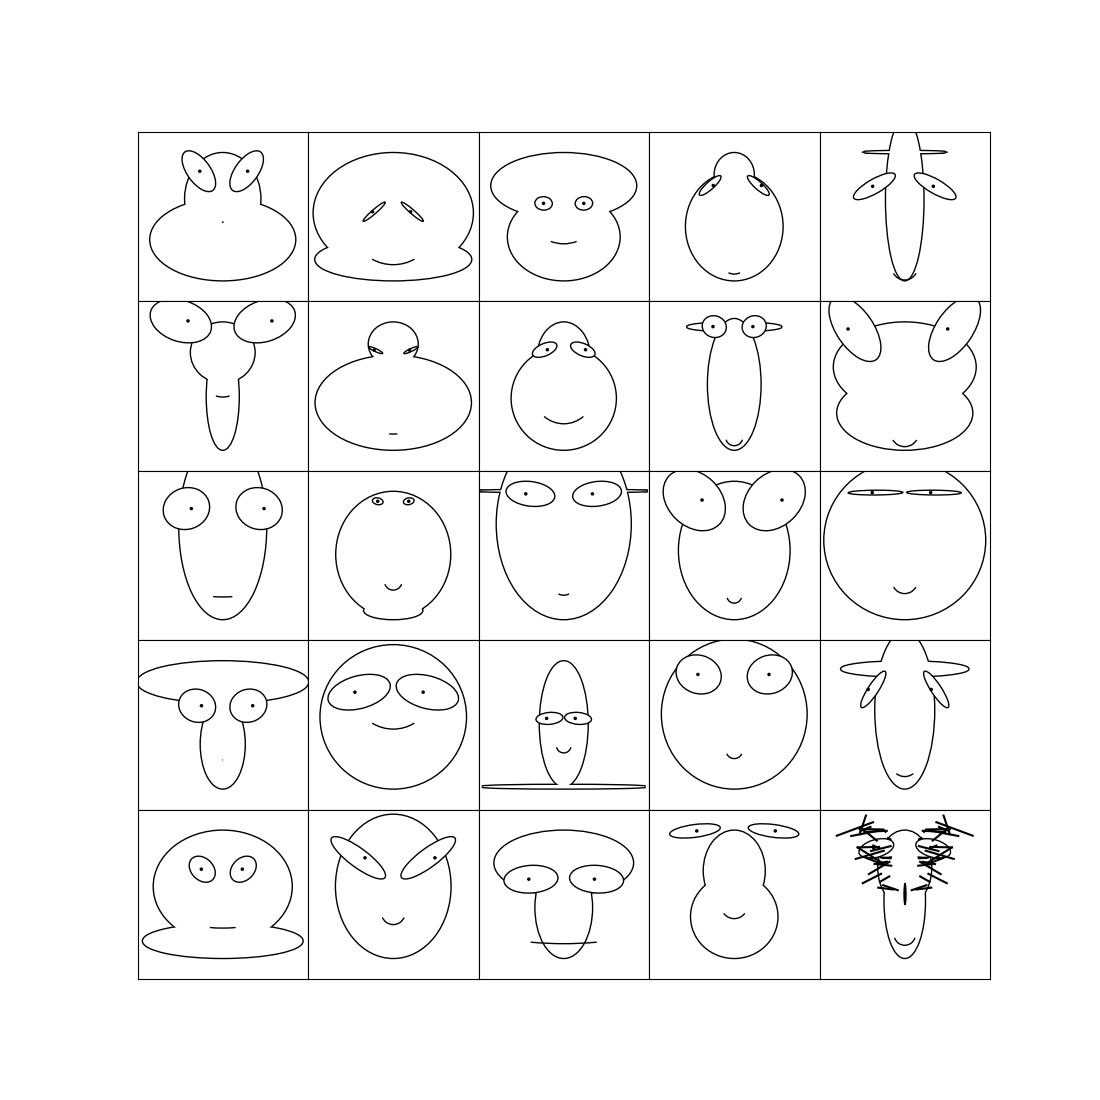

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Arc
from numpy.random import rand
import numpy as np

def cface(ax, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18):
    """
    This implementation of chernov faces is taken from Abraham Flaxman. You can
    find the original source files here: https://gist.github.com/aflaxman/4043086
    Only minor adjustments have been made.

     x1 = height  of upper face
     x2 = overlap of lower face
     x3 = half of vertical size of face
     x4 = width of upper face
     x5 = width of lower face
     x6 = length of nose
     x7 = vertical position of mouth
     x8 = curvature of mouth
     x9 = width of mouth
     x10 = vertical position of eyes
     x11 = separation of eyes
     x12 = slant of eyes
     x13 = eccentricity of eyes
     x14 = size of eyes
     x15 = position of pupils
     x16 = vertical position of eyebrows
     x17 = slant of eyebrows
     x18 = size of eyebrows
    """

    # transform some values so that input between 0,1 yields variety of output
    x3 = 1.9 * (x3 - .5)
    x4 = (x4 + .25)
    x5 = (x5 + .2)
    x6 = .3 * (x6 + .01)
    x8 = 5 * (x8 + .001)
    x11 /= 5
    x12 = 2 * (x12 - .5)
    x13 += .05
    x14 += .1
    x15 = .5 * (x15 - .5)
    x16 = .25 * x16
    x17 = .5 * (x17 - .5)
    x18 = .5 * (x18 + .1)

    # top of face, in box with l=-x4, r=x4, t=x1, b=x3
    e = Ellipse((0, (x1 + x3) / 2), 2 * x4, (x1 - x3), ec='black', linewidth=2)
    ax.add_artist(e)

    # bottom of face, in box with l=-x5, r=x5, b=-x1, t=x2+x3
    e = Ellipse((0, (-x1 + x2 + x3) / 2), 2 * x5, (x1 + x2 + x3), fc='white', ec='black', linewidth=2)
    ax.add_artist(e)

    # cover overlaps
    e = Ellipse((0, (x1 + x3) / 2), 2 * x4, (x1 - x3), fc='white', ec='none')
    ax.add_artist(e)
    e = Ellipse((0, (-x1 + x2 + x3) / 2), 2 * x5, (x1 + x2 + x3), fc='white', ec='none')
    ax.add_artist(e)

    # draw nose
    plt.plot([0, 0], [-x6 / 2, x6 / 2], 'k')

    # draw mouth
    p = Arc((0, -x7 + .5 / x8), 1 / x8, 1 / x8, theta1=270 - 180 / np.pi * np.arctan(x8 * x9),
            theta2=270 + 180 / np.pi * np.arctan(x8 * x9))
    ax.add_artist(p)

    # draw eyes
    p = Ellipse((-x11 - x14 / 2, x10), x14, x13 * x14, angle=-180 / np.pi * x12, fc='white', ec='black')
    ax.add_artist(p)

    p = Ellipse((x11 + x14 / 2, x10), x14, x13 * x14, angle=180 / np.pi * x12, fc='white', ec='black')
    ax.add_artist(p)

    # draw pupils
    p = Ellipse((-x11 - x14 / 2 - x15 * x14 / 2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    p = Ellipse((x11 + x14 / 2 - x15 * x14 / 2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)

    # draw eyebrows
    plt.plot([-x11 - x14 / 2 - x14 * x18 / 2, -x11 - x14 / 2 + x14 * x18 / 2],
             [x10 + x13 * x14 * (x16 + x17), x10 + x13 * x14 * (x16 - x17)], 'k')
    plt.plot([x11 + x14 / 2 + x14 * x18 / 2, x11 + x14 / 2 - x14 * x18 / 2],
             [x10 + x13 * x14 * (x16 + x17), x10 + x13 * x14 * (x16 - x17)], 'k')


fig, axes = plt.subplots(nrows=5, ncols=5, num='Chernoff Faces', figsize=(11, 11))
for ax in axes.flat:
    cface(ax, .9, *rand(17))
    ax.axis([-1.2, 1.2, -1.2, 1.2])
    ax.set(xticks=[], yticks=[])

fig.subplots_adjust(hspace=0, wspace=0)


### a) Data Visualization Techniques

Why do we need data visualization techniques and what are techniques to visualize high dimensional data?

Sometimes it is necessary to visualize high dimensional data and a projection via PCA or similar methods might not help enough: We might lose information in a 2D projection.

In those cases it is useful to come up with other representations of data which we could potentially print on a sheet of paper.

Techniques are usually glyphs, but different kinds of projection might already be enough (taking information loss into account).

### b) Chernoff faces

Why did Chernoff use faces for his representation? Why not something else, like dogs or houses?

Humans are exceptionally good at face recognition due to their brain area FFA. It is very easy to realize if one eye is bigger than another. Or whether eye brows are closer together in face-like images is much easier than figuring out differences in window sizes or changes in roof skewness between houses.

### c) Alternatives

Explain at least one other data visualization technique from the lecture.

- Scatterplot matrix: Scatter data into plots for each combination of two attributes.
- Glyphs: Map data dimensions onto parameters for geometrical figures, e.g. star glyphs, arrows. Properties could be lengths, widths, orientations, colors, ...
- Parallel coordinates: Use feature dimensions as one axis and feature values as another. Plot datapoints as lines.
- Projections: Several different techniques to project the data: PCA, scaling strategies, ...

## Assignment 3: Hebbian Learning (6 Points)

In the lecture (ML-07, Slides 10ff.) there is a simplified version of Ivan Pavlov's famous experiment on classical conditioning. In this exercise you will take a look into this simplified model and create your own conditionable dog with a simple Hebbian learning rule.

### a) Programming a Dog
To model the dog salivation behavior we will need to model an unconditioned and a conditioned stimulus: food and bell. They are represented as lists: `weight_food` and `weight_bell`. Note that one could just use a single number, the lists are only here to keep track of the history for a nice output. It is possible to access the current weight by selecting the last item of each list, respectively: `weight_food[-1]`.

A list of trials is already given as well as a condition database. Each entry represents an index to select from the `condition_db`. To figure out the value of the stimulus `food` in the second trial (which maps to condition `1`) one could do: `condition_db[1]["food"]`.

Your task is to implement a `for` loop over all trials. In each iteration select the correct values for $x_1$ and $x_2$ from the condition database and retrieve the current weights $w_1$ and $w_2$. Then calculate the response of the dog with the threshold $\theta$:

$$
r_t = \Theta(x_{1,t} w_{1,t-1} + x_{2,t} w_{2,t-1})\\
\Theta(x)= \begin{cases}1 \text{ if } x >= \theta\\0 \text{ else }\end{cases}
$$

With this response calculate both $w_{n,t}$ according to the Hebbian rule:

$$w_{n,t} = w_{n, t-1} + \epsilon \cdot r_t \cdot x_{n,t}$$

*Note: While you program the output might look a little messy, don't worry about it. Once you fill up all three lists properly, it will look much like on ML-07, Slide 14.*

In [ ]:
# Initialization
condition_db = [{"food": 1, "bell": 0}, 
                {"food": 0, "bell": 1},
                {"food": 1, "bell": 1}]

trials = [0, 1, 2, 2, 1, 2, 1]

epsilon = 0.2
theta = 1/2

responses = []
weight_food = [1]
weight_bell = [0]

# TODO: For each trial, update the current weights of the US and CS and store
# the results in the respective lists. Also store the response.
### BEGIN SOLUTION
for trial in trials:
    # Retrieve the data
    x_1 = condition_db[trial]["food"]
    x_2 = condition_db[trial]["bell"]
    w_1 = weight_food[-1]
    w_2 = weight_bell[-1]
    
    # Python interprets True as 1 and False as 0, so we can actually
    # just store the evaluation of r instead of doing an if/else
    response = x_1 * w_1 + x_2 * w_2 >= theta
    responses.append(response)
    
    weight_food.append(w_1 + epsilon * response * x_1)
    weight_bell.append(w_2 + epsilon * response * x_2)
### END SOLUTION

# Output
print("| Food   |   |" + "|   |".join(["{:3d}".format(condition_db[trial]["food"]) for trial in trials]) + "|   |")
print("| Bell   |   |" + "|   |".join(["{:3d}".format(condition_db[trial]["bell"]) for trial in trials]) + "|   |")
print("| Saliva |   |" + "|   |".join(["{:3d}".format(response) for response in responses]) + "|   |")
print("| w_Food |" + "|   |".join(["{:3.1f}".format(w) for w in weight_food]) + "|")
print("| w_Bell |" + "|   |".join(["{:3.1f}".format(w) for w in weight_bell]) + "|")

### b) Parameter adjustment

In the above default setting of trials (`[0, 1, 2, 2, 1, 2, 1]`, in case you changed it), how many learning steps did you need until the dog started to produce saliva on the conditioned stimulus? What happens if you change the parameters $\epsilon$ and $\theta$? Try smaller and bigger values for each or present different conditions to the dog.

Three learning steps were needed to train the dog to react to the conditioned stimulus.

With a smaller (but positive) epsilon the number of learning steps increases, while with a smaller threshold the number of learning steps decreases.
With a higher epsilon the number of learning steps decreases, while with a higher threshold (theta < 1, otherwise the dog won't even produce salive when it's presented with food) the number of learning steps increases.